# Libraries

In [ ]:
# Install version 0.5.1 of the smote_variants package for oversampling techniques
!pip install smote_variants==0.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=bc140f13f90f9aedfe3e301a9a8f1df3f6341f4a64c72e41d7eae389323ab6b8
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7436 sha256=3d3b46f3f30d6c9fce92f4e74a960fcb6f02e4e8a442d5402f96aaa3e96f9e3b
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


# Imports

In [ ]:
import torch
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
import tensorflow as tf
import smote_variants as sv
from google.colab import drive
from collections import Counter
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder
#from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tensorflow.keras.layers import Conv1D, concatenate,Flatten, MaxPooling1D, Concatenate
from tensorflow.keras.models import Model

# Access Dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read Data from CSV File
data = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset_100001_9.csv')


# Data Preprocessing

In [ ]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [ ]:
data.isnull().sum() # Check missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Check the data types of columns
data_types = data.dtypes

# Print the data types
print(data_types)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
# Convert object column to int64
data['gender'] = pd.factorize(data.gender)[0]
data['smoking_history'] = pd.factorize(data.smoking_history)[0]

In [ ]:
# Check the data types of columns
data_types = data.dtypes

# Print the data types
print(data_types)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0


In [ ]:
data.shape

(100000, 9)

In [ ]:
X = data.drop('diabetes', axis=1)  # select all columns except 'target'
y = data['diabetes']                # select only the 'target' column

#X = data.iloc[:2000, :-1]  # Select the first 2000 rows for features (excluding the last column)
#y = data.iloc[:2000, -1]   # Extract the 'diabetes' column (last column) for labels


In [ ]:
# Encode string labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to integers
y = y_encoded.astype(int)

In [ ]:
data.value_counts("diabetes")

diabetes
0    91500
1     8500
dtype: int64

# ProWSyn

In [ ]:
#ProWSyn
x_np = np.array(X)
y_np = np.array(y)

oversampler_ProWSyn = sv.ProWSyn(random_state=2)
x_resampled, y_resampled = oversampler_ProWSyn.sample(x_np, y_np)

class_counts = Counter(y_resampled)
print(class_counts)
print(data.value_counts("diabetes"))


2023-10-12 04:44:02,994:INFO:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': 2}")
INFO:smote_variants:ProWSyn: Running sampling via ('ProWSyn', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'L': 5, 'theta': 1.0, 'n_jobs': 1, 'random_state': 2}")
2023-10-12 04:44:03,044:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-10-12 04:44:03,108:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-10-12 04:44:05,291:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-10-12 04:44:05,322:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_varia

Counter({0: 91500, 1: 91500})
diabetes
0    91500
1     8500
dtype: int64


# Split Train, Test

In [ ]:
# Splitting original data for processing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting Data Obtained after Data Balancing
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
df_shape = x_resampled

# Normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'X' is your dataset as a numpy array
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Fit the scaler to the data and transform the data
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


# Epoch

In [ ]:
# Set the number of training epochs to 30
epoch = 30

# Echo State Network (ESN)

create_esn_model: This function creates a standard ESN model with a SimpleRNN layer as the reservoir layer and a Dense layer as the readout layer. It takes input_shape, reservoir_size, and output_shape as arguments to specify the architecture of the ESN. This is a standard and straightforward ESN implementation.

reservoir_layer: This function defines a custom reservoir layer using a Lambda layer. It uses K.dot to perform a dot product of the input data (x) with randomly initialized reservoir weights (W_res). The output of this layer is the element-wise hyperbolic tangent (tanh) of the dot product result. The reservoir_layer function is used in the second implementation of the ESN.

In [ ]:
start = time()

# Assuming you have X_train, y_train, X_test, y_test 1D arrays of data
input_shape = (X_train.shape[1], 1)  # Replace window_size with your desired input window size
output_shape = 1  # Replace this with the output shape for your specific task

# Define the reservoir sizes as a list
reservoir_sizes = [100, 10]  # You can modify this list as needed, it defines the sizes of each reservoir layer

# Create and compile the ESN model with multiple reservoir layers
esn_model = create_esn_model(input_shape, output_shape=output_shape)
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
esn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
esn_model.fit(X_train, y_train, epochs=epoch, batch_size=256, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_probs = esn_model.predict(X_test)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

end = time()
execution_time = end - start
print("Execution time:", execution_time)


NameError: ignored

# InceptionNet

In [ ]:
start = time()

def inception_block_1d(x, filters):
    # 1x1 convolution
    conv1x1_1 = Conv1D(filters[0], 1, activation='relu')(x)

    # 3x3 convolution
    conv1x1_2 = Conv1D(filters[1], 1, activation='relu')(x)
    conv3x3 = Conv1D(filters[2], 3, padding='same', activation='relu')(conv1x1_2)

    # 5x5 convolution
    conv1x1_3 = Conv1D(filters[3], 1, activation='relu')(x)
    conv5x5 = Conv1D(filters[4], 5, padding='same', activation='relu')(conv1x1_3)

    # Max pooling
    pool = MaxPooling1D(3, strides=1, padding='same')(x)
    conv1x1_4 = Conv1D(filters[5], 1, activation='relu')(pool)

    # Concatenate all branches
    inception_block = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])

    return inception_block

# Build the Inception-like model for 1D data with reduced complexity
def build_inception_1d(input_shape, num_classes):
    x = inception_block_1d(inputs, [32, 64, 64, 16, 16, 16])  # Reduced the number of filters
    x = Flatten()(x)
    x = Dense(128, activation='tanh')(x)  # Reduced the size of the fully connected layer
    outputs = Dense(num_classes, activation='tanh')(x)

    model = Model(inputs, outputs)
    return model

# Define the input shape
input_shape = (X_train.shape[1],1)  # Assuming 1D data with length 100

# Create the input layer
inputs = Input(shape=input_shape)
num_classes = 1
model = build_inception_1d(inputs, num_classes)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epoch, batch_size=256)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Result with Prowsyn")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)

end = time()
execution_time = end - start
print("Execution time:", execution_time)


# HYBRID

# ESN_InceptionNet Hybrid (parallel)

In [ ]:

def inception_block_1d(x, filters):
    # 1x1 convolution
    conv1x1_1 = Conv1D(filters[0], 1, activation='relu')(x)

    # 3x3 convolution
    conv1x1_2 = Conv1D(filters[1], 1, activation='relu')(x)
    conv3x3 = Conv1D(filters[2], 3, padding='same', activation='relu')(conv1x1_2)

    # 5x5 convolution
    conv1x1_3 = Conv1D(filters[3], 1, activation='relu')(x)
    conv5x5 = Conv1D(filters[4], 5, padding='same', activation='relu')(conv1x1_3)

    # Max pooling
    pool = MaxPooling1D(3, strides=1, padding='same')(x)
    conv1x1_4 = Conv1D(filters[5], 1, activation='relu')(pool)

    # Concatenate all branches
    inception_block = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])

    return inception_block

# Build the Inception-like model for 1D data with output shape (None, 1)
def build_inception_1d(input_shape, num_classes):
    inputs = Input(shape=input_shape)  # Input shape will be (batch_size, time_steps, features)
    x = inception_block_1d(inputs, [32, 64, 64, 16, 16, 16])  # Reduced the number of filters
    x = Flatten()(x)
    x = Dense(128, activation='tanh')(x)  # Reduced the size of the fully connected layer
    outputs = Dense(1, activation=sigmoid)(x)  # Output shape is (None, 1)

    model = Model(inputs, outputs)
    return model

def create_esn_model(input_shape, reservoir_sizes, output_shape=1):
    model = Sequential()

    # Multiple Reservoir layers (RNN stacked on top of each other)
    for reservoir_size in reservoir_sizes:
        model.add(SimpleRNN(reservoir_size, return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(reservoir_sizes[-1]))  # Final reservoir layer without return_sequences

    # Readout layer
    model.add(Dense(output_shape, activation='sigmoid'))

    return model

input_shape_inception = (X_train.shape[1], 1)  # Shape of your 1D input data for the Inception-like model
input_shape_esn = (X_train.shape[1], 1)  # Shape of your 1D input data for the ESN
num_classes = 1  # Number of classes for binary classification
reservoir_sizes = [50, 10]  # Sizes of the reservoir layers in the ESN

# Create the Inception-like model
inception_input = Input(shape=input_shape_inception)
inception_model = build_inception_1d(input_shape_inception, num_classes)
inception_output = inception_model(inception_input)

# Create the ESN model
esn_input = Input(shape=input_shape_esn)
esn_model = create_esn_model(input_shape_esn, reservoir_sizes)
esn_output = esn_model(esn_input)

# Merge both models using Concatenate layer
concatenated_outputs = concatenate([inception_output, esn_output])

# Add dense layers for binary classification
x = Dense(64, activation='sigmoid')(concatenated_outputs)
x = Dense(32, activation='sigmoid')(x)
output = Dense(num_classes, activation='sigmoid')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[inception_input, esn_input], outputs=output)

# Compile the hybrid model
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the hybrid model on your data
batch_size = 256
start_time = time()
hybrid_model.fit([X_train, X_train], y_train, epochs=1, batch_size=batch_size, validation_data=([X_test, X_test], y_test))
end_time = time()
execution_time = end_time - start_time

# Evaluate the hybrid model on the testing data
y_test_pred = hybrid_model.predict([X_test, X_test])
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Calculate metrics for testing
accuracy = accuracy_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)

# Print the evaluation metrics for testing
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

print("Execution time:", execution_time)


# 10-Fold Cross Validation for Model Validation

In [ ]:
import time
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def inception_block_1d(x, filters):
    # 1x1 convolution
    conv1x1_1 = Conv1D(filters[0], 1, activation='relu')(x)

    # 3x3 convolution
    conv1x1_2 = Conv1D(filters[1], 1, activation='relu')(x)
    conv3x3 = Conv1D(filters[2], 3, padding='same', activation='relu')(conv1x1_2)

    # 5x5 convolution
    conv1x1_3 = Conv1D(filters[3], 1, activation='relu')(x)
    conv5x5 = Conv1D(filters[4], 5, padding='same', activation='relu')(conv1x1_3)

    # Max pooling
    pool = MaxPooling1D(3, strides=1, padding='same')(x)
    conv1x1_4 = Conv1D(filters[5], 1, activation='relu')(pool)

    # Concatenate all branches
    inception_block = Concatenate(axis=-1)([conv1x1_1, conv3x3, conv5x5, conv1x1_4])

    return inception_block

from tensorflow.keras.activations import sigmoid  # Add this import

# Build the Inception-like model for 1D data with output shape (None, 1)
def build_inception_1d(input_shape, num_classes):
    inputs = Input(shape=input_shape)  # Input shape will be (batch_size, time_steps, features)
    x = inception_block_1d(inputs, [32, 64, 64, 16, 16, 16])  # Reduced the number of filters
    x = Flatten()(x)
    x = Dense(128, activation='tanh')(x)  # Reduced the size of the fully connected layer
    outputs = Dense(1, activation=sigmoid)(x)  # Output shape is (None, 1)

    model = Model(inputs, outputs)
    return model

def create_esn_model(input_shape, reservoir_sizes, output_shape=1):
    model = Sequential()

    # Multiple Reservoir layers (RNN stacked on top of each other)
    for reservoir_size in reservoir_sizes:
        model.add(SimpleRNN(reservoir_size, return_sequences=True, input_shape=input_shape))
    model.add(SimpleRNN(reservoir_sizes[-1]))  # Final reservoir layer without return_sequences

    # Readout layer
    model.add(Dense(output_shape, activation='sigmoid'))

    return model

# Define the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
execution_time_list = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Create the Inception-like model
    inception_input_shape = (X_train_fold.shape[1], 1)
    inception_num_classes = 1
    inception_model = build_inception_1d(inception_input_shape, inception_num_classes)

    # Create the ESN model
    esn_input_shape = (X_train_fold.shape[1], 1)
    esn_output_shape = 1
    reservoir_sizes = [64, 32]
    esn_model = create_esn_model(esn_input_shape, reservoir_sizes, esn_output_shape)

    # Create the hybrid sequential model
    hybrid_model = Sequential()
    hybrid_model.add(inception_model)
    hybrid_model.add(Flatten())
    hybrid_model.add(esn_model)

    # Compile the hybrid model
    hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the hybrid model
    start_time = time.time()
    hybrid_model.fit(X_train_fold, y_train_fold, epochs=epoch, batch_size=256, verbose=0)
    end_time = time.time()

    # Evaluate the hybrid model on the validation data
    y_pred_val = hybrid_model.predict(X_val_fold)
    y_pred_val = np.round(y_pred_val).astype(int)

    accuracy_val = accuracy_score(y_val_fold, y_pred_val)
    f1_val = f1_score(y_val_fold, y_pred_val)
    precision_val = precision_score(y_val_fold, y_pred_val)
    recall_val = recall_score(y_val_fold, y_pred_val)
    fold_execution_time = end_time-start_time

    # Append metrics to lists
    accuracy_list.append(accuracy_val)
    f1_list.append(f1_val)
    precision_list.append(precision_val)
    recall_list.append(recall_val)
    execution_time_list.append(end_time - start_time)

    print(f"Fold {fold + 1} - Accuracy: {accuracy_val}, F1 Score: {f1_val}, "
          f" Precision: {precision_val}, Recall: {recall_val}",
          f" Execution Time: {fold_execution_time:.2f} seconds")

# Calculate and print average metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_f1 = np.mean(f1_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_execution_time = np.mean(execution_time_list)

print("\nAverage Metrics Across Folds:")
print(f"Average Validation Accuracy: {avg_accuracy}")
print(f"Average Validation F1 Score: {avg_f1}")
print(f"Average Validation Precision: {avg_precision}")
print(f"Average Validation Recall: {avg_recall}")
print(f"Average Execution Time: {avg_execution_time} seconds")


458/458 [==============================] - 2s 3ms/step
Fold 1 - Accuracy: 0.9590846994535519, F1 Score: 0.9576887758705941,  Precision: 0.9915167471113061, Recall: 0.9260928961748633  Execution Time: 265.65 seconds
458/458 [==============================] - 2s 3ms/step
Fold 2 - Accuracy: 0.9630464480874317, F1 Score: 0.9620696908083852,  Precision: 0.9881895434250324, Recall: 0.9372950819672131  Execution Time: 214.44 seconds
458/458 [==============================] - 2s 3ms/step
Fold 3 - Accuracy: 0.9595628415300547, F1 Score: 0.9597004765146359,  Precision: 0.9564450474898236, Recall: 0.9629781420765028  Execution Time: 205.60 seconds
458/458 [==============================] - 2s 3ms/step
Fold 4 - Accuracy: 0.9574453551912568, F1 Score: 0.9555666500249625,  Precision: 0.9995523724261415, Recall: 0.9152889739035387  Execution Time: 264.91 seconds
458/458 [==============================] - 1s 2ms/step
Fold 5 - Accuracy: 0.9615437158469945, F1 Score: 0.9610784652609747,  Precision: 0.97

# SHAP

In [ ]:
!pip install shap

In [ ]:
import shap
import tqdm
background_summary = shap.kmeans(X_train, 25)
model = hybrid_model
# Create SHAP explainer using KernelExplainer with summarized background data
with tqdm.tqdm(total=len(X_train)) as pbar:
    explainer = shap.KernelExplainer(model.predict, background_summary)
    pbar.update(len(X_train))

# Calculate SHAP values for the test set
with tqdm.tqdm(total=len(X_test)) as pbar:
    shap_values = explainer.shap_values(X_test)
    pbar.update(len(X_test))

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  0%|          | 0/2910 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  0%|          | 0/728 [00:00<?, ?it/s]

  0%|          | 0/728 [00:00<?, ?it/s]

199/199 [==============================] - 0s 2ms/step


100%|██████████| 728/728 [08:40<00:00,  1.40it/s]


## GRAPHS

In [ ]:
# Assuming 'shap_values' has a shape of (1, 728, 8)
shap_values = np.squeeze(shap_values)

# Now 'shap_values' will have a shape of (728, 8)
print(shap_values.shape)

Shape of shap_values: (1, 728, 8)
Shape of X_test: (728, 8)
(728, 8)


### Summary

In [ ]:
shap.summary_plot(shap_values,X_test,feature_names=X.columns)

# Save the plot to a file
plt.savefig('Summary_plot.png')  # You can change the filename and extension as needed
plt.close()  # Close the plot to free up resources

NameError: ignored

### waterfall

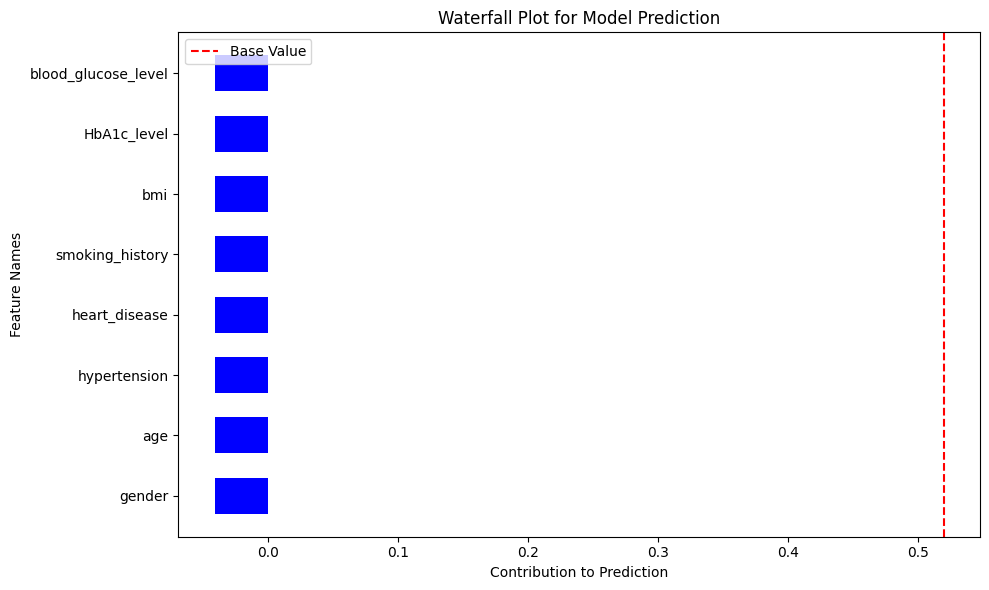

In [ ]:
instance_index = 0

# Assuming your model is a single-output model
model_output_index = 0

# Calculate the base value for the specific model output
base_value = explainer.expected_value[model_output_index]

# Calculate the contribution of each feature for the selected instance
instance_contributions = shap_values[model_output_index][instance_index]

# Get the names of the features
feature_names = X.columns

# Calculate the cumulative contributions
cumulative_contributions = np.cumsum(instance_contributions)

# Create the waterfall plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, cumulative_contributions, color='b', height=0.6, align='center')
plt.axvline(x=base_value, color='red', linestyle='--', linewidth=1.5, label='Base Value')
plt.xlabel('Contribution to Prediction')
plt.ylabel('Feature Names')
plt.title('Waterfall Plot for Model Prediction')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Save the plot to a file
plt.savefig('WaterFall_plot.png')  # You can change the filename and extension as needed
plt.close()  # Close the plot to free up resources

### HeatMap

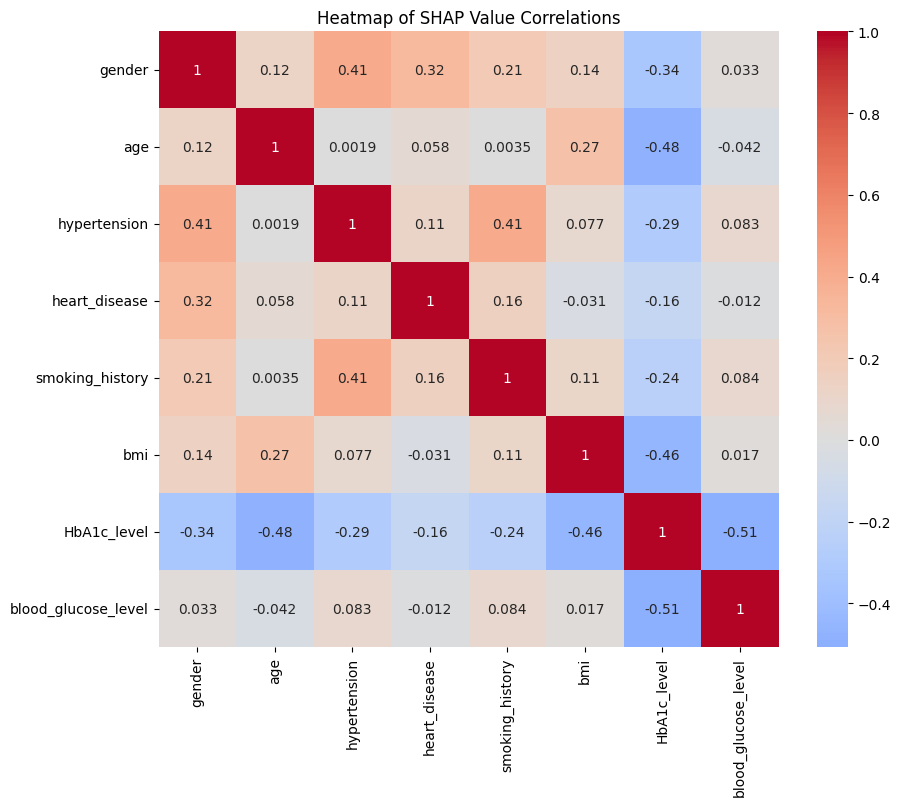

In [ ]:
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your SHAP values calculated and stored in shap_values
# Assuming you have your feature values in X (as a DataFrame)

# Initialize the SHAP visualization
shap.initjs()

# Get the absolute SHAP values for each feature (you can use other aggregation functions as well)
shap_abs = pd.DataFrame(np.abs(shap_values), columns=X.columns)

# Calculate the correlation matrix based on SHAP values
correlation_matrix = shap_abs.corr()

# Create the Heatmap Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of SHAP Value Correlations')
plt.show()

# Save the plot to a file
plt.savefig('HeatMap.png')  # You can change the filename and extension as needed
plt.close()  # Close the plot to free up resources

### Bar Plot

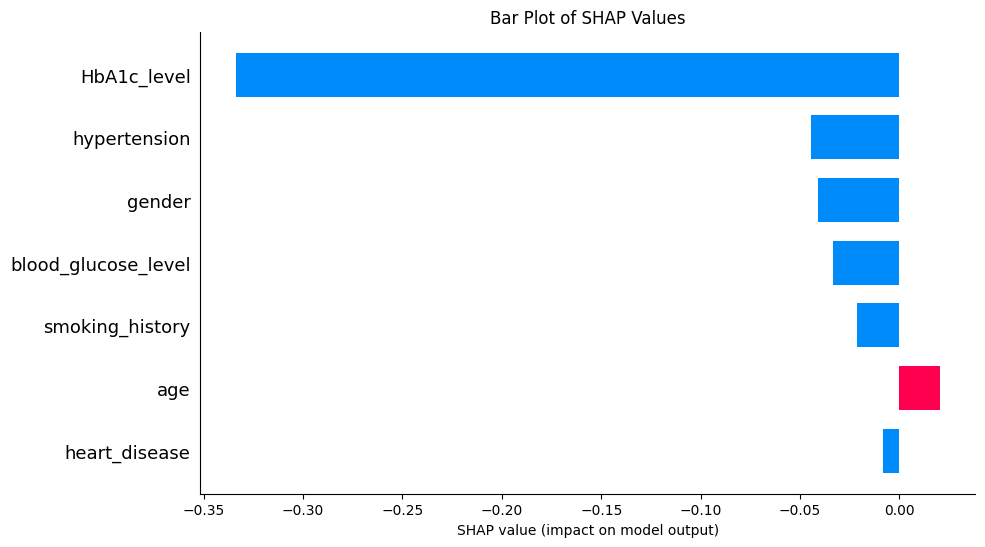

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your SHAP values calculated and stored in shap_values
# Assuming you have your feature values for the instance you want to visualize in X_instance (as a DataFrame)

# Initialize the SHAP visualization
shap.initjs()

# Choose the index of the instance for which you want to create the Bar Plot
instance_index = 0  # Replace with the index of the instance you want to visualize

# Create the Bar Plot
plt.figure(figsize=(10, 6))
shap.bar_plot(shap_values[instance_index], feature_names=X.columns, show=False)
plt.title('Bar Plot of SHAP Values')
plt.show()

# Save the plot to a file
plt.savefig('bar_plot.png')  # You can change the filename and extension as needed
plt.close()  # Close the plot to free up resources